In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

import missingno as msno
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



from sklearn.model_selection import cross_validate

from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)

%matplotlib inline  

housing_raw = pd.read_csv('Ames_HousePrice.csv', index_col=0)
price = housing_raw['SalePrice'].copy()
housing_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [59]:
housing_raw = housing_raw[housing_raw['GrLivArea']< 4000]

In [60]:
df_num = housing_raw.select_dtypes(['int64','float64'])
df_num['LotFrontage'].fillna(df_num['LotFrontage'].mean(), inplace = True)

# Because there is only 1 null value for area, we just fill in with the Year the house was built
df_num.loc[df_num['GarageArea'].isnull(), 'GarageYrBlt'] = df_num.loc[df_num['GarageArea'].isnull(),'YearBuilt']
df_num['GarageArea'].fillna(housing_raw[housing_raw['GarageType']== 'Detchd']['GarageArea'].mean(), inplace = True)


df_num.drop(['SalePrice', 'PID'],inplace=True, axis = 1)
# MsnrVrArea, TotalBsmtSF, GarageCars, BsmtHalfBath, BsmtFullBath
df_num.fillna(0,inplace = True)
price = housing_raw['SalePrice'].copy()
# msno.bar(df_num)
df_num

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,856,30,68.470227,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
2,1049,120,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
3,1001,30,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
4,1039,70,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
5,1665,60,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,30,68.470227,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5,2009
760,1733,20,68.470227,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,6,2009
761,2002,90,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007
762,1842,60,68.470227,8826,7,5,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,486.0,193,96,0,0,0,0,0,7,2007


# Label Encoding the Categorical Features

<Axes: >

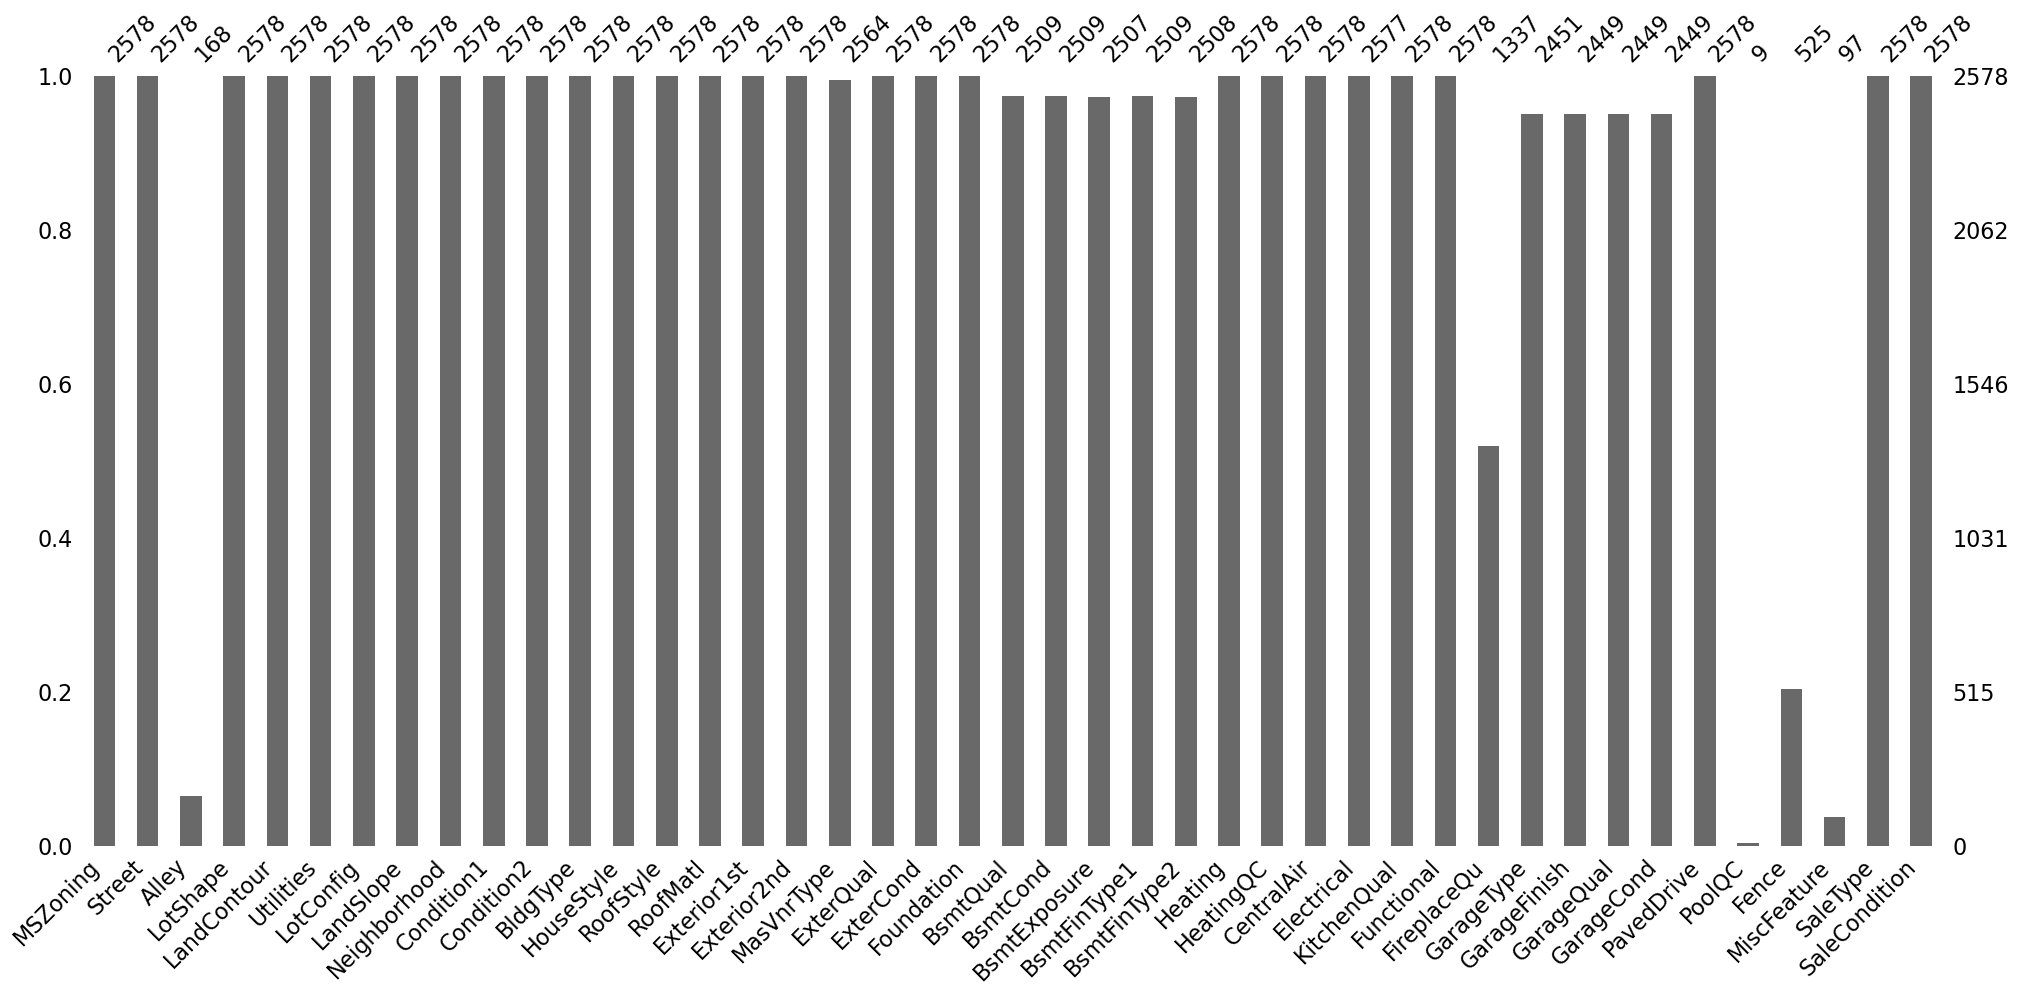

In [61]:
df_cat = housing_raw.select_dtypes(['object']).copy()
msno.bar(df_cat)

In [62]:
df_cat['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', nan], dtype=object)

In [63]:
df_cat = housing_raw.select_dtypes(['object']).copy()
df_cat.fillna('None', inplace = True)

for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,5,1,1,3,3,0,0,0,21,2,2,0,2,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,4,4,6,2,5,3,5,5,2,3,4,1,9,4
2,5,1,1,3,3,0,4,0,7,2,2,4,2,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,4,2,6,3,1,0,5,5,2,3,4,1,9,4
3,1,1,1,3,3,0,4,0,11,2,2,0,2,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,4,2,6,3,5,3,5,4,0,3,4,1,9,4
4,5,1,1,3,3,0,0,0,20,2,2,0,5,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,4,4,6,3,5,3,5,5,0,3,4,1,9,4
5,5,1,1,3,3,0,4,0,17,2,2,0,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,4,2,6,3,1,0,5,5,2,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,5,1,1,3,3,0,4,0,3,2,2,0,1,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,1,6,2,5,3,1,4,1,3,4,1,9,4
760,5,1,1,0,3,0,1,0,7,2,2,0,2,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,4,3,2,1,3,5,5,2,3,4,1,9,4
761,4,1,1,3,1,0,4,0,6,2,2,2,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,4,6,3,0,3,5,5,2,3,4,1,9,4
762,5,1,1,3,3,0,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,4,2,6,5,1,0,5,5,2,3,4,1,9,4


<Axes: >

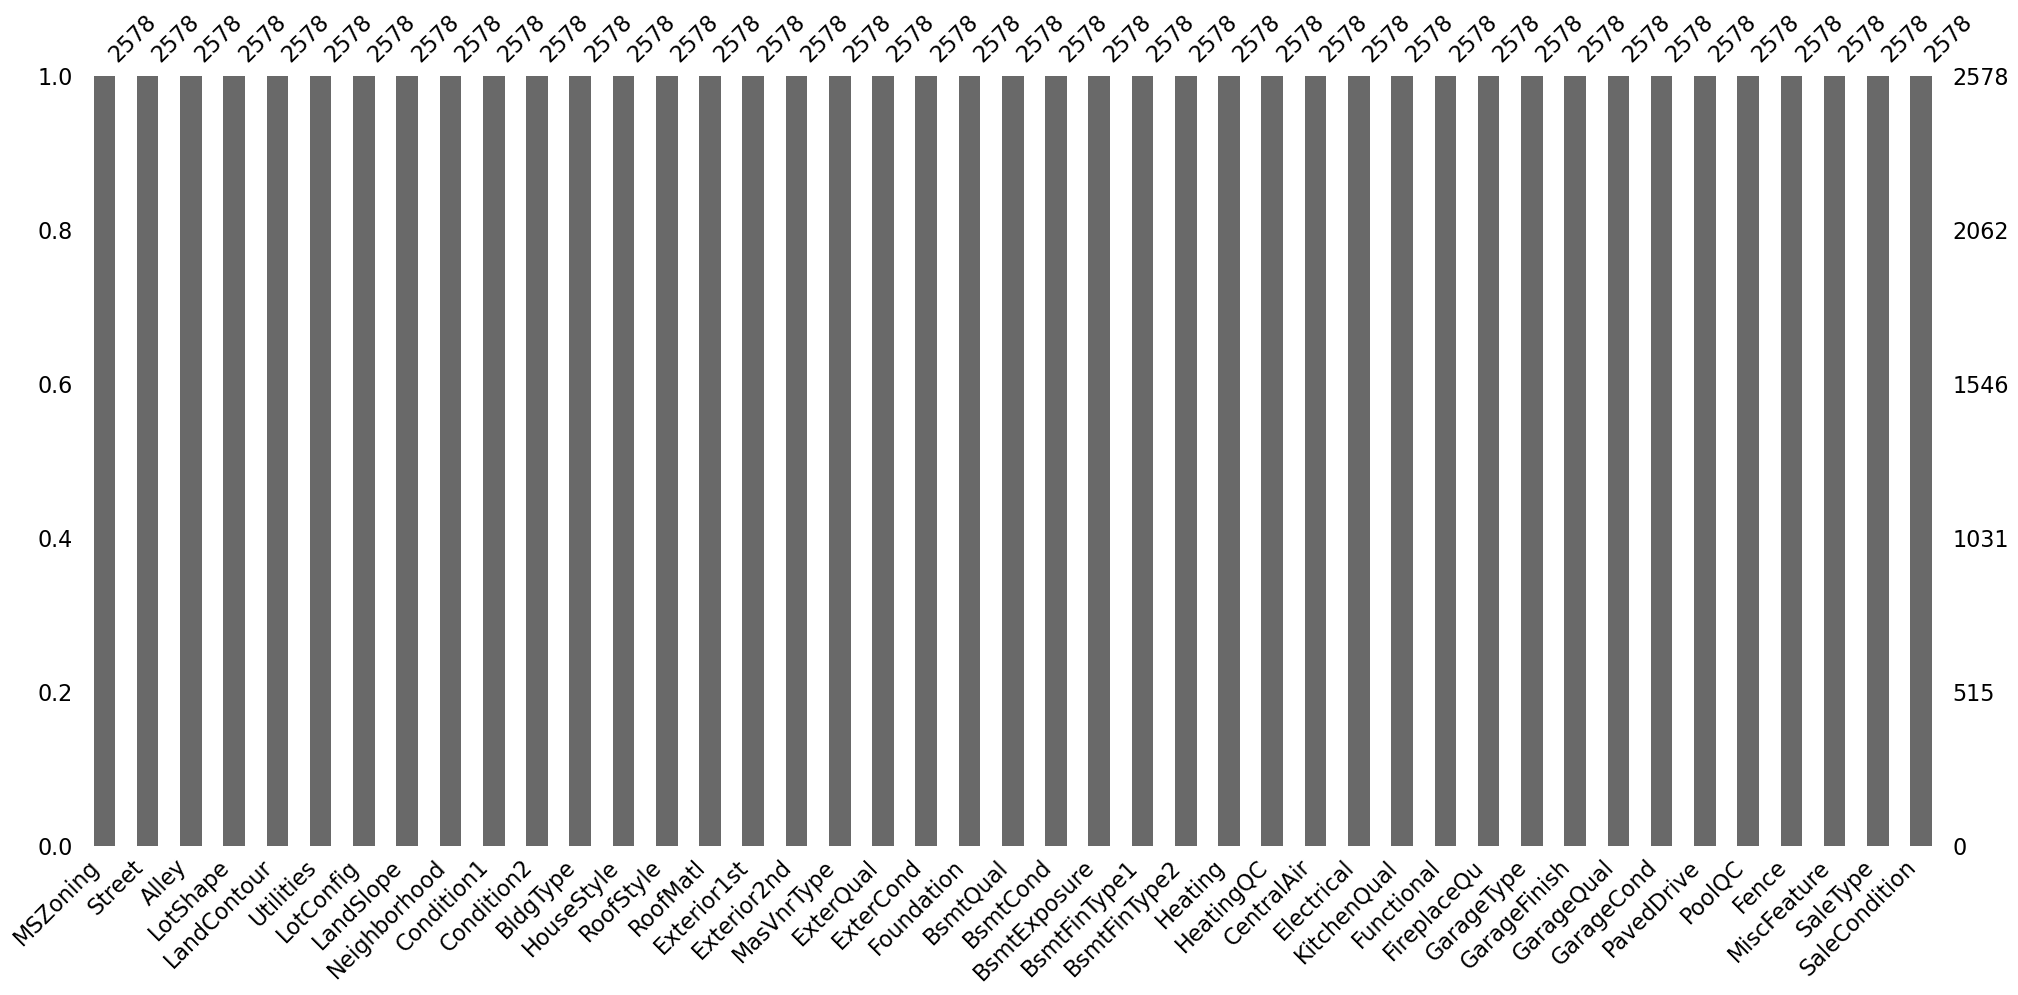

In [64]:
msno.bar(df_cat)

In [65]:
df_cat1 = housing_raw.select_dtypes(['object']).copy()
df_cat1.fillna('None', inplace = True)

MSZoning_mapping = {'A (agr)': 1, 'C (all)':2, 'FV':3, 'I (all)':4, 'RH':5, 'RL':6, 'RP':7, 'RP':8, 'RM':9}
df_cat1['MSZoning'] = df_cat1['MSZoning'].map(MSZoning_mapping)

Street_mapping = {'Grvl': 1, 'Pave':2}
df_cat1['Street'] = df_cat1['Street'].map(Street_mapping)

Alley_mapping = {'None':1, 'Grvl': 2, 'Pave':3}
df_cat1['Alley'] = df_cat1['Alley'].map(Alley_mapping)

LotShape_mapping = {'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}
df_cat1['LotShape'] = df_cat1['LotShape'].map(LotShape_mapping)

LandContour_mapping = {'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4}
df_cat1['LandContour'] = df_cat1['LandContour'].map(LandContour_mapping)

Utilities_mapping = {'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4}
df_cat1['Utilities'] = df_cat1['Utilities'].map(Utilities_mapping)

LotConfig_mapping = {'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5}
df_cat1['LotConfig'] = df_cat1['LotConfig'].map(LotConfig_mapping)

LandSlope_mapping = {'Gtl':1, 'Mod':2, 'Sev':3}
df_cat1['LandSlope'] = df_cat1['LandSlope'].map(LandSlope_mapping)

Neighborhood_mapping = {
    'SWISU':1, 
    'Edwards':2, 
    'IDOTRR':3, 
    'OldTown':4, 
    'NWAmes':5, 
    'Blmngtn':6, 
    'Mitchel':7, 
    'NridgHt':8, 
    'NAmes':9,
    'CollgCr':10,
    'SawyerW':11,
    'MeadowV':12,
    'BrDale':13,
    'Gilbert':14,
    'Timber':15,
    'Somerst':16,
    'BrkSide':17,
    'NoRidge':18,
    'Sawyer':19,
    'Crawfor':20,
    'Greens':21,
    'ClearCr':22,
    'GrnHill':23,
    'StoneBr':24,
    'Veenker':25,
    'NPkVill':26, 
    'Blueste':27, 
    'Landmrk':28}
df_cat1['Neighborhood'] = df_cat1['Neighborhood'].map(Neighborhood_mapping)

Condition1_mapping = {
    'Artery':1, 
    'Feedr':2, 
    'Norm':3, 
    'RRNn':4, 
    'RRAn':5, 
    'PosN':6, 
    'PosA':7, 
    'RRNe':8, 
    'RRAe':9}
df_cat1['Condition1'] = df_cat1['Condition1'].map(Condition1_mapping)
df_cat1['Condition2'] = df_cat1['Condition2'].map(Condition1_mapping)

BldgType_mapping = {
    
    '1Fam':1, 
    '2fmCon':2, 
    'Duplex':3, 
    'TwnhsE':4, 
    'Twnhs':5}
df_cat1['BldgType'] = df_cat1['BldgType'].map(BldgType_mapping)

HouseStyle_mapping = {
    '1Story':1, 
    '1.5Fin':2, 
    '1.5Unf':3, 
    '2Story':4, 
    '2.5Fin':5,
    '2.5Unf':6,
    'SFoyer':7,
    'SLvl':8}
df_cat1['HouseStyle'] = df_cat1['HouseStyle'].map(HouseStyle_mapping)

RoofStyle_mapping = {
    'Flat':1, 
    'Gable':2, 
    'Gambrel':3, 
    'Hip':4, 
    'Mansard':5,
    'Shed':6}
df_cat1['RoofStyle'] = df_cat1['RoofStyle'].map(RoofStyle_mapping)

RoofMatl_mapping = {
    'ClyTile':1, 
    'CompShg':2, 
    'Membran':3, 
    'Metal':4, 
    'Roll':5,
    'Tar&Grv':6,
    'WdShake':7, 
    'WdShngl':8}
df_cat1['RoofMatl'] = df_cat1['RoofMatl'].map(RoofMatl_mapping)



Exterior1st_mapping = {
    'AsbShng':1, 
    'AsphShn':2, 
    'BrkComm':3, 
    'BrkFace':4, 
    'CBlock':5, 
    'CemntBd':6, 
    'HdBoard':7, 
    'ImStucc':8, 
    'MetalSd':9,
    'Other':10,
    'Plywood':11,
    'PreCast':12,
    'Stone':13,
    'Stucco':14,
    'VinylSd':15,
    'Wd Sdng':16,
    'WdShing':17
    }
df_cat1['Exterior1st'] = df_cat1['Exterior1st'].map(Exterior1st_mapping)

Exterior2nd_mapping = {
    'Wd Sdng':1,
    'HdBoard':2,
    'MetalSd':3,
    'VinylSd':4,
    'Wd Shng':5,
    'Plywood':6,
    'Stucco':7,
    'CmentBd':8,
    'AsbShng':9,
    'ImStucc':10,
    'BrkFace':11,
    'Brk Cmn':12,
    'CBlock':13,
    'AsphShn':14,
    'Stone':15,
    'PreCast':16
}

df_cat1['Exterior2nd'] = df_cat1['Exterior2nd'].map(Exterior2nd_mapping)

MasVnrType_mapping = {
    'BrkCmn':1, 
    'BrkFace':2, 
    'CBlock':3, 
    'None':4, 
    'Stone':5
    }
df_cat1['MasVnrType'] = df_cat1['MasVnrType'].map(MasVnrType_mapping)

Foundation_mapping = {
    'BrkTil':1, 
    'CBlock':2, 
    'PConc':3, 
    'Slab':4, 
    'Stone':5,
    'Wood':6
    }
df_cat1['Foundation'] = df_cat1['Foundation'].map(Foundation_mapping)

BsmtExposure_mapping = {
    'None':0,
    'Gd':1, 
    'Av':2, 
    'Mn':3, 
    'No':4
    }
df_cat1['BsmtExposure'] = df_cat1['BsmtExposure'].map(BsmtExposure_mapping)

BsmtFinType1_mapping = {
    'None':0,
    'GLQ':1, 
    'ALQ':2, 
    'BLQ':3, 
    'Rec':4,
    'LwQ':5,
    'Unf':6
    }
df_cat1['BsmtFinType1'] = df_cat1['BsmtFinType1'].map(BsmtFinType1_mapping)
df_cat1['BsmtFinType2'] = df_cat1['BsmtFinType2'].map(BsmtFinType1_mapping)

Heating_mapping = {
    'Floor':1, 
    'GasA':2, 
    'GasW':3, 
    'Grav':4,
    'OthW':5,
    'Wall':6
    }
df_cat1['Heating'] = df_cat1['Heating'].map(Heating_mapping)

Electrical_mapping = {
    'None':0,
    'SBrkr':1, 
    'FuseA':2, 
    'FuseF':3, 
    'FuseP':4,
    'Mix':5
    }
df_cat1['Electrical'] = df_cat1['Electrical'].map(Electrical_mapping)

Functional_mapping = {
    'Typ':1, 
    'Min1':2, 
    'Min2':3, 
    'Mod':4,
    'Maj1':5,
    'Maj2':6,
    'Sev':7,
    'Sal':8
    }
df_cat1['Functional'] = df_cat1['Functional'].map(Functional_mapping)

GarageType_mapping = {
    'None':0,
    '2Types':1, 
    'Attchd':2, 
    'Basment':3, 
    'BuiltIn':4,
    'CarPort':5,
    'Detchd':6
    }
df_cat1['GarageType'] = df_cat1['GarageType'].map(GarageType_mapping)

Fence_mapping = {
    'None':0,
    'GdPrv':4, 
    'MnPrv':3, 
    'GdWo':2, 
    'MnWw':1
    }
df_cat1['Fence'] = df_cat1['Fence'].map(Fence_mapping)

MiscFeature_mapping = {
    'None':0,
    'Elev':4, 
    'Gar2':3, 
    'Othr':2, 
    'Shed':1,
    'TenC':6
    }
df_cat1['MiscFeature'] = df_cat1['MiscFeature'].map(MiscFeature_mapping)

SaleType_mapping = {
    'WD ':1, 
    'ConLD':2,
    'New':3,
    'Oth':4,
    'ConLw':5,
    'COD':6,
    'CWD':7,
    'Con':8,
    'ConLI':9,
    'VWD':10
    }
df_cat1['SaleType'] = df_cat1['SaleType'].map(SaleType_mapping)

SaleCondition_mapping = {
    'Normal':1,
    'Abnorml':2,
    'AdjLand':3,
    'Alloca':4,
    'Family':5,
    'Partial':6
    
    }
df_cat1['SaleCondition'] = df_cat1['SaleCondition'].map(SaleCondition_mapping)



# Define the mapping
po_ex_ordinal_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5}
# Apply the mapping
df_cat1['ExterQual'] = df_cat1['ExterQual'].map(po_ex_ordinal_mapping)
df_cat1['ExterCond'] = df_cat1['ExterCond'].map(po_ex_ordinal_mapping)
df_cat1['KitchenQual'] = df_cat1['KitchenQual'].map(po_ex_ordinal_mapping)
df_cat1['HeatingQC'] = df_cat1['HeatingQC'].map(po_ex_ordinal_mapping)


# Defind the mapping
none_ex6_ordinal_mapping = {'None': 0, 'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5}
# Apply the mapping
df_cat1['BsmtQual'] = df_cat1['BsmtQual'].map(none_ex6_ordinal_mapping)
df_cat1['BsmtCond'] = df_cat1['BsmtCond'].map(none_ex6_ordinal_mapping)
df_cat1['FireplaceQu'] = df_cat1['FireplaceQu'].map(none_ex6_ordinal_mapping)
df_cat1['GarageQual'] = df_cat1['GarageQual'].map(none_ex6_ordinal_mapping)
df_cat1['GarageCond'] = df_cat1['GarageCond'].map(none_ex6_ordinal_mapping)
 

# Define the mapping
none_fin_ordinal_mapping = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin':3}
# Applying the mapping
df_cat1['GarageFinish'] = df_cat1['GarageFinish'].map(none_fin_ordinal_mapping)


# Define the mapping
none_ex5_ordinal_mapping = {'None': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4}
# Applying the mapping
df_cat1['PoolQC'] = df_cat1['PoolQC'].map(none_ex5_ordinal_mapping)

# Define mapping
binary_mapping = {'Y': 1, 'N':0, 'P':2}
df_cat1['CentralAir'] = df_cat1['CentralAir'].map(binary_mapping)
df_cat1['PavedDrive'] = df_cat1['PavedDrive'].map(binary_mapping)




df_cat1

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,6,2,1,1,1,1,2,1,1,3,3,1,1,2,2,16,1,4,3,3,2,3,3,4,4,6,2,3,1,1,3,1,4,6,1,3,3,1,0,0,0,1,1
2,6,2,1,1,1,1,1,1,2,3,3,4,1,2,2,7,2,2,4,3,2,4,3,3,1,2,2,3,1,1,4,1,0,2,3,3,3,1,0,0,0,1,1
3,2,2,1,1,1,1,1,1,3,3,3,1,1,4,2,9,3,4,4,3,1,3,3,4,2,6,2,5,1,1,4,1,0,6,1,3,1,0,0,0,0,1,1
4,6,2,1,1,1,1,2,1,4,3,3,1,4,2,2,9,3,4,4,4,1,2,3,4,6,6,2,4,1,1,3,1,0,6,1,3,3,0,0,0,0,1,1
5,6,2,1,1,1,1,1,1,5,3,3,1,4,2,2,15,4,4,4,3,3,4,3,4,1,6,2,5,1,1,4,1,0,2,3,3,3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,2,1,1,1,1,1,1,17,3,3,1,3,2,2,16,1,4,3,3,1,3,3,4,6,6,4,2,0,3,2,1,4,6,1,2,1,2,0,0,0,1,1
760,6,2,1,2,1,1,3,1,2,3,3,1,1,4,2,4,1,4,3,3,4,0,0,0,0,0,2,5,1,2,3,3,4,2,1,3,3,1,0,0,0,1,1
761,5,2,1,1,3,1,1,1,20,3,3,3,4,2,2,9,3,4,3,3,2,3,3,4,3,6,2,3,0,2,3,1,0,1,1,3,3,1,0,0,0,1,1
762,6,2,1,1,1,1,1,1,10,3,3,1,4,2,2,15,4,2,4,3,3,4,3,4,1,6,2,5,1,1,4,1,3,2,3,3,3,1,0,0,0,1,1


<Axes: >

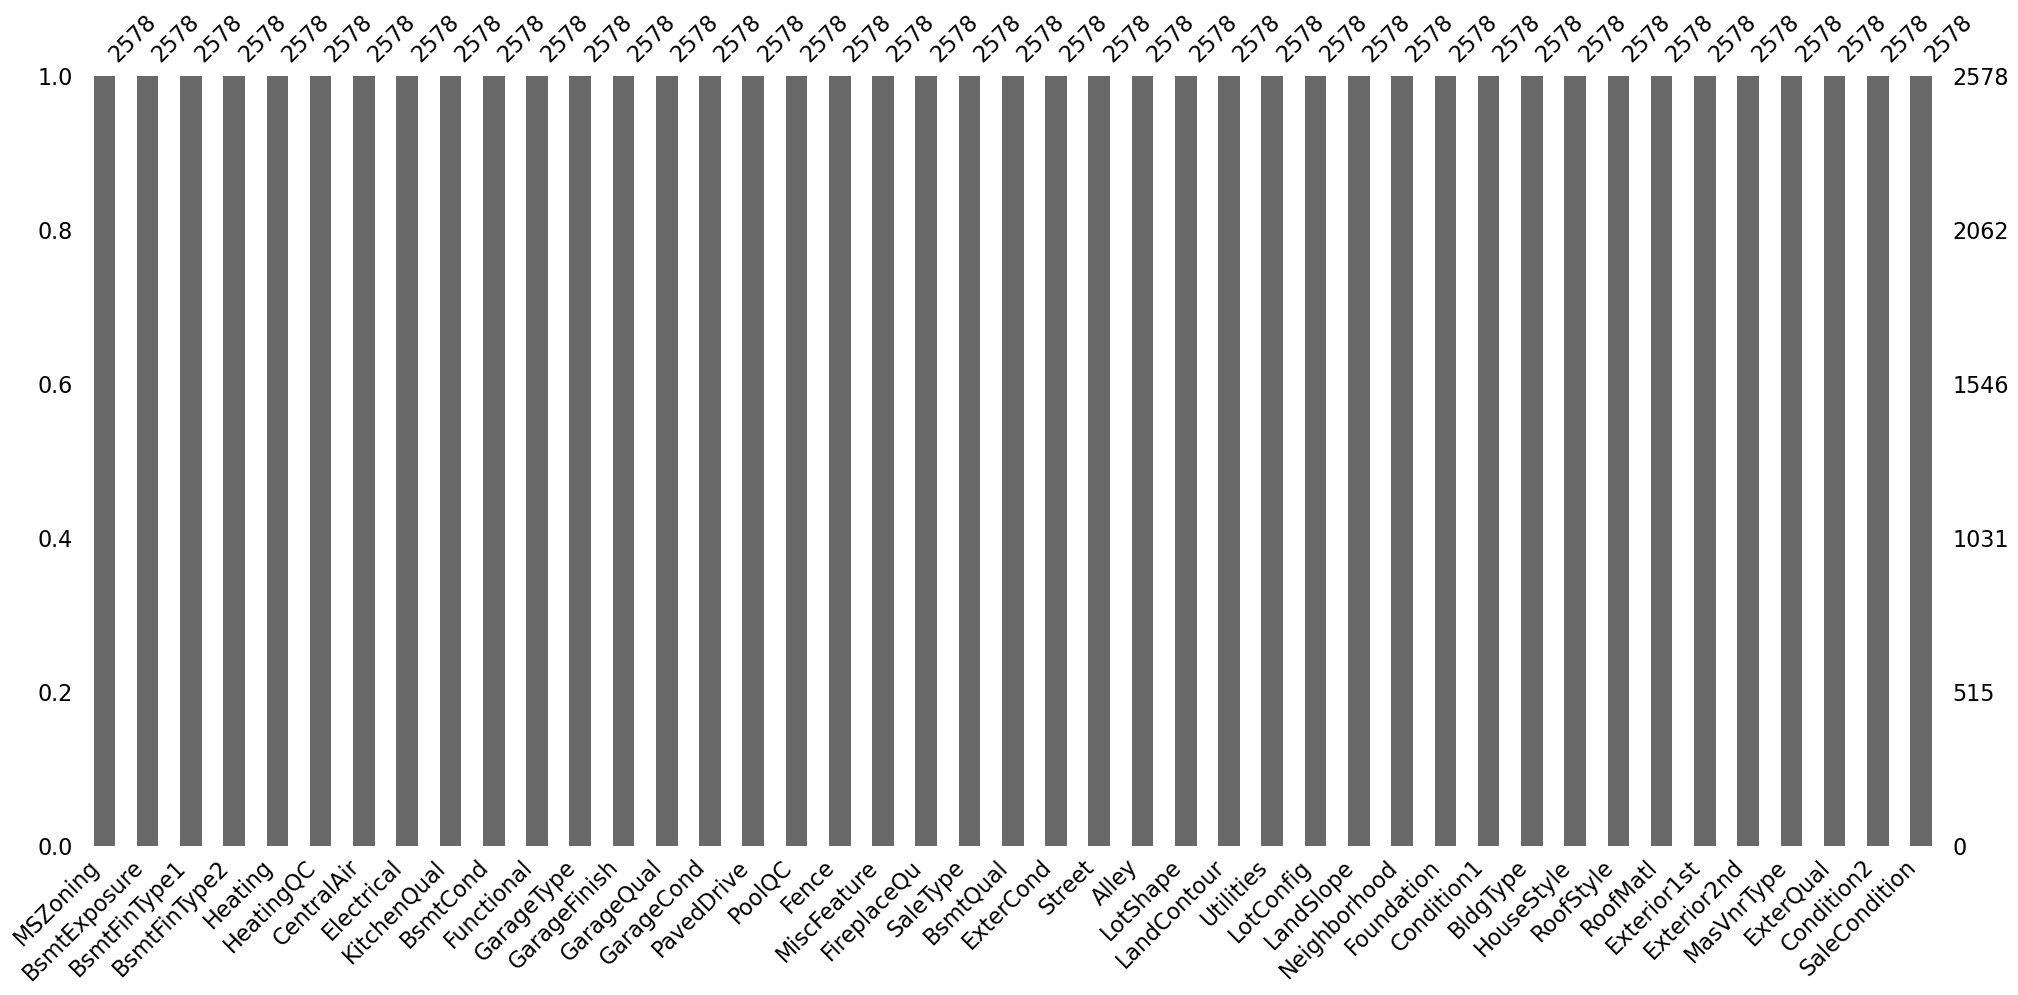

In [66]:
msno.bar(df_cat1, sort = 'ascending')

In [67]:
df = pd.concat([df_num, df_cat1], axis = 1)
df = df[['OverallQual', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtFinSF1',
       'MasVnrArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'LotFrontage',
       'GarageYrBlt', 'BsmtUnfSF', 'FullBath', 'OverallCond', 'Fireplaces',
       '2ndFlrSF', 'MSSubClass', 'TotRmsAbvGrd', 'BedroomAbvGr',
       'BsmtFullBath', 'HalfBath', 'BsmtFinSF2', 'BsmtHalfBath',
       'KitchenAbvGr', 'LowQualFinSF']]

In [68]:
x = df
y = price
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor()

In [69]:
scores = []
fold_num = 1
for train_index, test_index in kf.split(x):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

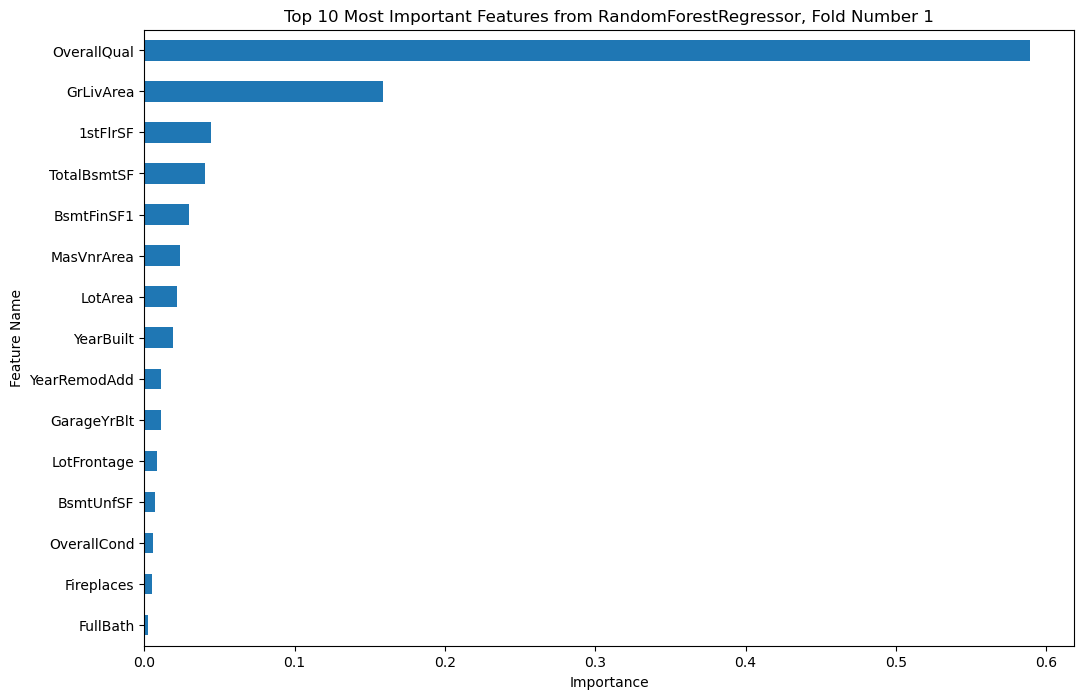

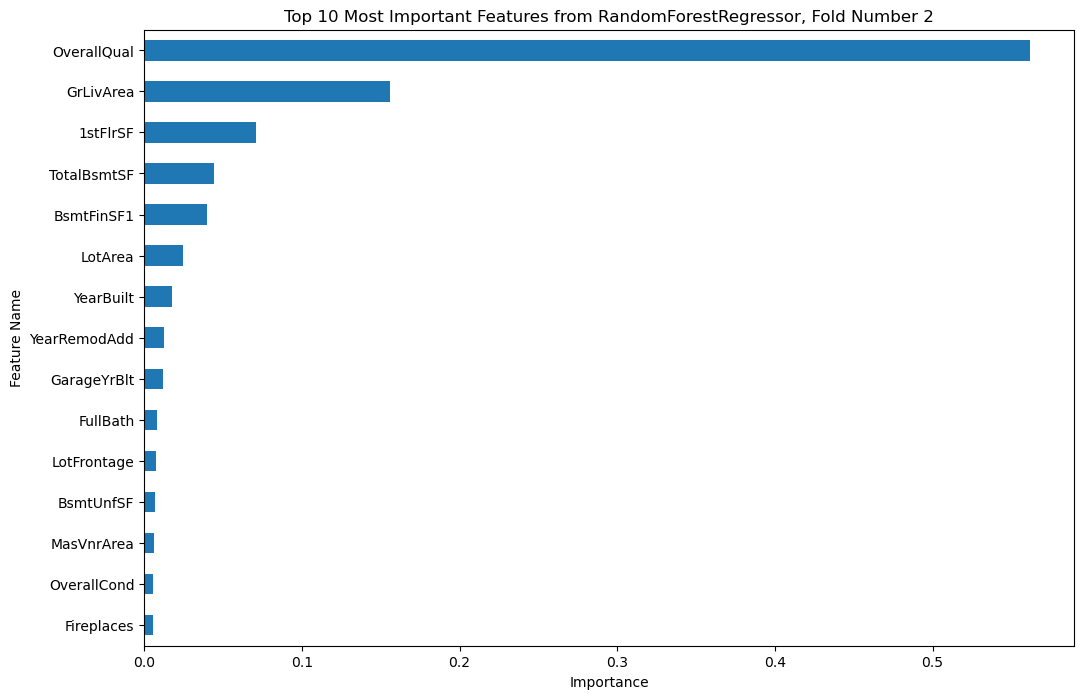

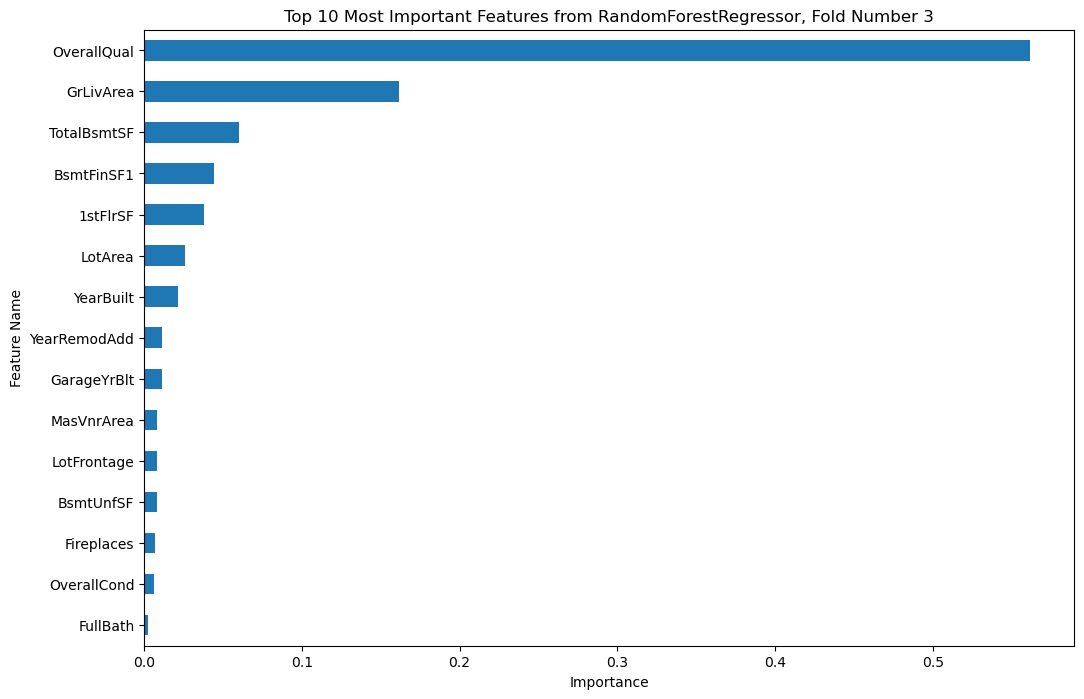

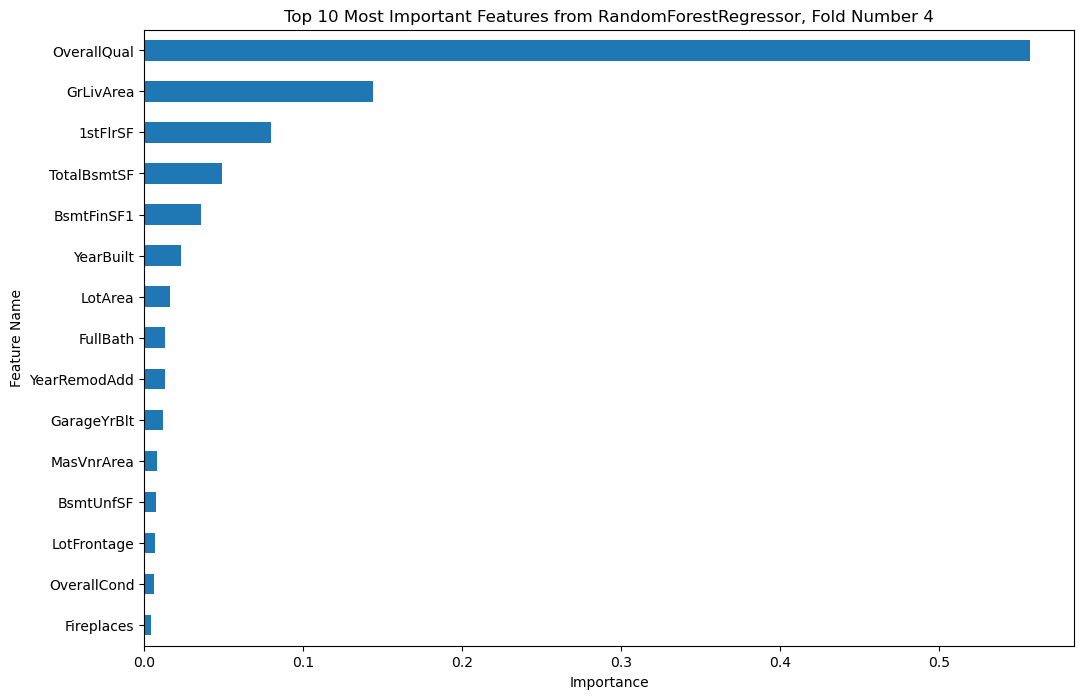

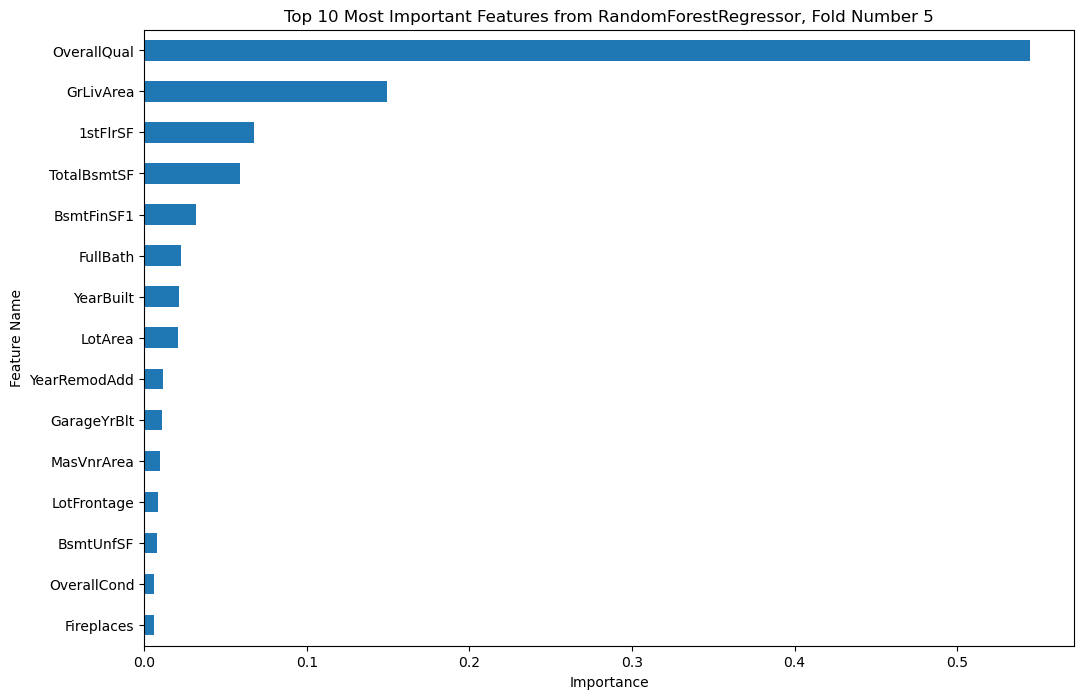

In [70]:
scores = []
fold_num = 1
for train_index, test_index in kf.split(x):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    rf.fit(X_train, y_train)
    fold_score = rf.score(X_test, y_test)
    # Store best parameters and score
    scores.append({
        'score':fold_score,
        'fold':fold_num})
    # Map importances to the column names
    important_features = rf.feature_importances_
    feature_importances = pd.Series(important_features, index=X_train.columns).head(15)
    feature_importances = feature_importances.sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(12, 8))
    feature_importances.plot(kind='barh')
    plt.title(f'Top 10 Most Important Features from RandomForestRegressor, Fold Number {fold_num}')
    plt.xlabel('Importance')
    plt.ylabel('Feature Name')
    plt.gca().invert_yaxis() 
    fold_num +=1

In [71]:
scores

[{'score': 0.895693787145032, 'fold': 1},
 {'score': 0.8911248477985443, 'fold': 2},
 {'score': 0.9102450749873001, 'fold': 3},
 {'score': 0.8983840321076312, 'fold': 4},
 {'score': 0.8999950490396433, 'fold': 5}]

In [72]:
total_score = 0
for i, el in enumerate(scores):
    total_score += el['score']
    avg_score = total_score / (i+1)
print(avg_score)

0.8990885582156303


In [75]:
%%time
rf = RandomForestRegressor()
scores = []
params_list = []
fold_num = 1
# Defining Grid Search
param_grid = {
    'n_estimators': [300,400,500,700,800,900, 1000],
    'max_features': [6,8,10,12,14,16],
    'n_jobs': [-1],
    'random_state':[42]
}
# Configure GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=kf, scoring='r2',return_train_score=True)
# Fitting Grid Search
grid_search.fit(x, y)
best_score = grid_search.best_score_

best_forest = grid_search.best_estimator_

print(f'Best Score:', best_score)
print(f'Best Params:', best_forest)

# Store best parameters and score
params_list.append({
    'params':grid_search.best_params_,
    # 'fold': fold_num,
    })
scores.append({
    'score':best_score,
    # 'fold':fold_num
    })


Best Score: 0.910559819855974
Best Params: RandomForestRegressor(max_features=8, n_estimators=1000, n_jobs=-1,
                      random_state=42)
CPU times: user 1min 35s, sys: 29.7 s, total: 2min 4s
Wall time: 4min 26s


In [51]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
22,0.501083,0.011147,0.034622,0.002799,12,400,-1,42,"{'max_features': 12, 'n_estimators': 400, 'n_j...",0.903649,0.910178,0.916501,0.914886,0.917884,0.912620,0.005184,1,0.988134,0.987586,0.986970,0.987210,0.986911,0.987362,0.000453
11,0.792928,0.053444,0.065176,0.002360,8,800,-1,42,"{'max_features': 8, 'n_estimators': 800, 'n_jo...",0.907780,0.909957,0.915832,0.915899,0.913618,0.912617,0.003243,2,0.988239,0.987790,0.986965,0.987589,0.987307,0.987578,0.000432
21,0.389998,0.014952,0.025683,0.000250,12,300,-1,42,"{'max_features': 12, 'n_estimators': 300, 'n_j...",0.902964,0.910481,0.916050,0.915110,0.918409,0.912603,0.005464,3,0.988106,0.987545,0.987005,0.987243,0.987024,0.987385,0.000410
10,0.651525,0.012755,0.056227,0.000190,8,700,-1,42,"{'max_features': 8, 'n_estimators': 700, 'n_jo...",0.907472,0.910180,0.915469,0.916064,0.913731,0.912583,0.003276,4,0.988314,0.987723,0.986932,0.987549,0.987277,0.987559,0.000463
23,0.671966,0.038200,0.041167,0.000885,12,500,-1,42,"{'max_features': 12, 'n_estimators': 500, 'n_j...",0.904026,0.910310,0.916237,0.914508,0.917819,0.912580,0.004957,5,0.988234,0.987600,0.986999,0.987207,0.986870,0.987382,0.000493
17,0.798995,0.031173,0.058109,0.001615,10,700,-1,42,"{'max_features': 10, 'n_estimators': 700, 'n_j...",0.905022,0.910008,0.916417,0.916908,0.914434,0.912558,0.004486,6,0.988283,0.987578,0.986951,0.987381,0.987024,0.987443,0.000479
18,0.886537,0.012573,0.064312,0.001001,10,800,-1,42,"{'max_features': 10, 'n_estimators': 800, 'n_j...",0.905032,0.909997,0.916454,0.916496,0.914617,0.912519,0.004430,7,0.988325,0.987607,0.987020,0.987436,0.987081,0.987494,0.000469
19,0.993912,0.016221,0.072344,0.001520,10,900,-1,42,"{'max_features': 10, 'n_estimators': 900, 'n_j...",0.905060,0.909748,0.916188,0.916685,0.914545,0.912445,0.004432,8,0.988353,0.987646,0.987084,0.987478,0.987077,0.987528,0.000469
20,1.092600,0.021092,0.079865,0.002777,10,1000,-1,42,"{'max_features': 10, 'n_estimators': 1000, 'n_...",0.905214,0.909665,0.916127,0.916630,0.914496,0.912426,0.004366,9,0.988385,0.987649,0.987102,0.987493,0.987122,0.987550,0.000468
24,0.901464,0.042651,0.057023,0.001612,12,700,-1,42,"{'max_features': 12, 'n_estimators': 700, 'n_j...",0.902915,0.909932,0.916774,0.915134,0.917105,0.912372,0.005381,10,0.988270,0.987532,0.986983,0.987282,0.986921,0.987397,0.000488


In [50]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.414814,0.351863,0.027134,0.002730,6,300,-1,42,"{'max_features': 6, 'n_estimators': 300, 'n_jo...",0.908923,0.908641,0.913434,0.915700,0.912680,0.911876,0.002716,27,0.988180,0.987515,0.987100,0.987810,0.987167,0.987554,0.000404
1,0.331944,0.015216,0.051939,0.035891,6,400,-1,42,"{'max_features': 6, 'n_estimators': 400, 'n_jo...",0.908813,0.909151,0.913323,0.916120,0.913631,0.912207,0.002809,17,0.988183,0.987424,0.987061,0.987794,0.987174,0.987527,0.000413
2,0.440601,0.017588,0.044650,0.002217,6,500,-1,42,"{'max_features': 6, 'n_estimators': 500, 'n_jo...",0.908813,0.909442,0.913436,0.916238,0.913336,0.912253,0.002763,15,0.988292,0.987491,0.987082,0.987695,0.987126,0.987537,0.000441
3,0.563737,0.057228,0.061664,0.010556,6,700,-1,42,"{'max_features': 6, 'n_estimators': 700, 'n_jo...",0.908951,0.909294,0.913454,0.915684,0.912880,0.912053,0.002572,23,0.988287,0.987579,0.987163,0.987714,0.987215,0.987592,0.000406
4,0.673756,0.046430,0.068782,0.004170,6,800,-1,42,"{'max_features': 6, 'n_estimators': 800, 'n_jo...",0.908726,0.909320,0.913278,0.915842,0.913526,0.912138,0.002703,19,0.988269,0.987663,0.987184,0.987734,0.987317,0.987633,0.000379
5,0.774999,0.035407,0.073074,0.003348,6,900,-1,42,"{'max_features': 6, 'n_estimators': 900, 'n_jo...",0.908848,0.908973,0.913202,0.915440,0.913375,0.911967,0.002618,25,0.988312,0.987720,0.987236,0.987733,0.987361,0.987672,0.000375
6,0.832426,0.034783,0.081207,0.003857,6,1000,-1,42,"{'max_features': 6, 'n_estimators': 1000, 'n_j...",0.909038,0.908664,0.913609,0.915287,0.912834,0.911886,0.002605,26,0.988285,0.987713,0.987242,0.987746,0.987385,0.987674,0.000361
7,0.290077,0.004354,0.026465,0.000816,8,300,-1,42,"{'max_features': 8, 'n_estimators': 300, 'n_jo...",0.906264,0.910471,0.915069,0.914945,0.911288,0.911607,0.003258,28,0.988096,0.987734,0.986980,0.987533,0.987236,0.987516,0.000388
8,0.376408,0.006591,0.032966,0.000427,8,400,-1,42,"{'max_features': 8, 'n_estimators': 400, 'n_jo...",0.906699,0.910172,0.915435,0.915552,0.912396,0.912051,0.003347,24,0.988243,0.987689,0.986965,0.987536,0.987256,0.987538,0.000431
9,0.517013,0.027999,0.062688,0.043721,8,500,-1,42,"{'max_features': 8, 'n_estimators': 500, 'n_jo...",0.907812,0.910097,0.915091,0.916143,0.912714,0.912372,0.003089,11,0.988281,0.987666,0.986951,0.987539,0.987232,0.987534,0.000449


In [49]:
cv_results_df.sort_values('rank_test_score')['params'][22]

{'max_features': 12, 'n_estimators': 400, 'n_jobs': -1, 'random_state': 42}

In [57]:
%%time
rf = RandomForestRegressor()
scores = []
fold_num = 1
param_grid = {
    'n_estimators': [400],
    'max_features': [12],
    'n_jobs': [-1],
    'random_state':[42]
}
model_cv_score = cross_val_score(RandomForestRegressor(n_estimators= 400, max_features=12, n_jobs=-1, random_state=42),x,y)
print(model_cv_score)
print(np.mean(model_cv_score))
# for train_index, test_index in kf.split(x):
    
#     X_train, X_test = x.iloc[train_index], x.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2',return_train_score=True)
#     grid_search.fit(X_train, y_train)
#     best_score = grid_search.best_score_
#     best_forest = grid_search.best_estimator_
#     print(f'Score for Fold: {fold_num}', fold_score)
#     print(f'Best Params for Fold {fold_num}', best_forest)

#     # Store best parameters and score
#     scores.append({
#         'score':best_score,
#         'fold':fold_num})
#     # Map importances to the column names
#     important_features = best_forest.feature_importances_
#     feature_importances = pd.Series(important_features, index=X_train.columns).head(25)
#     feature_importances = feature_importances.sort_values(ascending=False)

#     # Plot
#     plt.figure(figsize=(12, 8))
#     feature_importances.plot(kind='barh')
#     plt.title(f'Top 25 Most Important Features from RandomForestRegressor, Fold Number {fold_num}')
#     plt.xlabel('Importance')
#     plt.ylabel('Feature Name')
#     plt.gca().invert_yaxis() 
#     fold_num +=1

[0.90364859 0.91017824 0.91650144 0.91488646 0.91788446]
0.9126198387174155
CPU times: user 871 ms, sys: 438 ms, total: 1.31 s
Wall time: 3.32 s


In [53]:
scores

[{'score': 0.9054794794848307, 'fold': 1},
 {'score': 0.9056481199967994, 'fold': 2},
 {'score': 0.9225498627826776, 'fold': 3},
 {'score': 0.9095493807278555, 'fold': 4},
 {'score': 0.904601297206168, 'fold': 5}]

In [54]:
total_score = 0
for i, el in enumerate(scores):
    total_score += el['score']
    avg_score = total_score / (i+1)
print(avg_score)

0.9095656280396662


In [140]:
%%time
rf = RandomForestRegressor()
scores = []
fold_num = 1
param_grid = {
    'n_estimators': [125,150,175],
    'max_features': [8,10,12],
    'max_leaf_nodes':[None,],
    'n_jobs': [-1],
    'random_state':[42]
}
for train_index, test_index in kf.split(x):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2',return_train_score=True)
    grid_search.fit(X_train, y_train)
    fold_score = grid_search.score(X_test, y_test)
    best_forest = grid_search.best_estimator_
    print(f'Score for Fold: {fold_num}', fold_score)
    print(f'Best Params for Fold {fold_num}', best_forest)

    # Store best parameters and score
    scores.append({
        'score':fold_score,
        'fold':fold_num})
#     # Map importances to the column names
#     important_features = best_forest.feature_importances_
#     feature_importances = pd.Series(important_features, index=X_train.columns).head(25)
#     feature_importances = feature_importances.sort_values(ascending=False)

#     # Plot
#     plt.figure(figsize=(12, 8))
#     feature_importances.plot(kind='barh')
#     plt.title(f'Top 10 Most Important Features from RandomForestRegressor, Fold Number {fold_num}')
#     plt.xlabel('Importance')
#     plt.ylabel('Feature Name')
#     plt.gca().invert_yaxis() 
    fold_num +=1

Score for Fold: 1 0.9049687574923699
Best Params for Fold 1 RandomForestRegressor(max_features=12, n_estimators=175, n_jobs=-1,
                      random_state=42)
Score for Fold: 2 0.9063496556570502
Best Params for Fold 2 RandomForestRegressor(max_features=8, n_estimators=125, n_jobs=-1,
                      random_state=42)
Score for Fold: 3 0.9214500526159838
Best Params for Fold 3 RandomForestRegressor(max_features=8, n_estimators=175, n_jobs=-1,
                      random_state=42)
Score for Fold: 4 0.9110249760298846
Best Params for Fold 4 RandomForestRegressor(max_features=10, n_estimators=175, n_jobs=-1,
                      random_state=42)
Score for Fold: 5 0.9052397651240343
Best Params for Fold 5 RandomForestRegressor(max_features=8, n_estimators=150, n_jobs=-1,
                      random_state=42)
CPU times: user 29.2 s, sys: 7.55 s, total: 36.8 s
Wall time: 37 s


In [141]:
scores

[{'score': 0.9049687574923699, 'fold': 1},
 {'score': 0.9063496556570502, 'fold': 2},
 {'score': 0.9214500526159838, 'fold': 3},
 {'score': 0.9110249760298846, 'fold': 4},
 {'score': 0.9052397651240343, 'fold': 5}]

In [142]:
total_score = 0
for i, el in enumerate(scores):
    total_score += el['score']
    avg_score = total_score / (i+1)
print(avg_score)

0.9098066413838645


In [103]:
param_grid = {
    'n_estimators': [150, 200, 250],
    'min_samples_split':[6,7,8,9],
    'min_samples_leaf':[3,4,5,6,7],
    'max_depth': [None, 30, 35, 40]
}

Best Params for Fold 1 RandomForestRegressor(min_samples_leaf=3, min_samples_split=6, n_estimators=250)
Best Params for Fold 2 RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=200)
Best Params for Fold 3 RandomForestRegressor(max_depth=35, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=200)
Best Params for Fold 4 RandomForestRegressor(max_depth=40, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=250)
Best Params for Fold 5 RandomForestRegressor(max_depth=35, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=250)
CPU times: user 1h 44min 38s, sys: 12 s, total: 1h 44min 50s
 Wall time: 1h 45min 50s


[{'score': 0.8926631754279668, 'fold': 1},
 {'score': 0.8904942209308075, 'fold': 2},
 {'score': 0.9159100990936627, 'fold': 3},
 {'score': 0.8991954200767617, 'fold': 4},
 {'score': 0.8988668834682413, 'fold': 5}]

0.899425959799488
______________________________________________________________________________________________________________

param_grid = {
    'n_estimators': [200, 250, 300],
    'min_samples_split':[15,20, 25, 30],
    'min_samples_leaf':[20, 25, 30],
    'max_depth': [None, 30, 35, 40]
}
Best Params for Fold 1 RandomForestRegressor(max_depth=35, min_samples_leaf=20, min_samples_split=20,
                      n_estimators=250)
Best Params for Fold 2 RandomForestRegressor(min_samples_leaf=20, min_samples_split=20,
                      n_estimators=200)
Best Params for Fold 3 RandomForestRegressor(max_depth=35, min_samples_leaf=20, min_samples_split=20,
                      n_estimators=300)
Best Params for Fold 4 RandomForestRegressor(min_samples_leaf=20, min_samples_split=20,
                      n_estimators=200)
Best Params for Fold 5 RandomForestRegressor(max_depth=30, min_samples_leaf=20, min_samples_split=25,
                      n_estimators=200)
[{'score': 0.8532653067479661, 'fold': 1},
 {'score': 0.851963810957133, 'fold': 2},
 {'score': 0.8867848158186596, 'fold': 3},
 {'score': 0.8689660805432269, 'fold': 4},
 {'score': 0.8728845319754821, 'fold': 5}]

0.8667729092084937
______________________________________________________________________________________________________________

param_grid = {
    'n_estimators': [125,150,175],
    'max_features': [8,10,12],
    'max_depth':[None,100],
    # 'min_samples_leaf':[2],
}

[{'score': 0.9074059818791149, 'fold': 1},
 {'score': 0.9057808872801372, 'fold': 2},
 {'score': 0.9214042253031505, 'fold': 3},
 {'score': 0.9079369853324444, 'fold': 4},
 {'score': 0.903224965452368, 'fold': 5}]

0.9091506090494429
______________________________________________________________________________________________________________

param_grid = {
    'n_estimators': [125,150,175],
    'max_features': [8,10,12],
    'max_depth':[None,100,150],
    # 'min_samples_leaf':[2],
    'min_samples_split':[3]
}
[{'score': 0.900878309479056, 'fold': 1},
 {'score': 0.908970497203354, 'fold': 2},
 {'score': 0.9200385901923092, 'fold': 3},
 {'score': 0.9076574042215351, 'fold': 4},
 {'score': 0.9055207737842648, 'fold': 5}]
0.9086131149761038
______________________________________________________________________________________________________________

fold_num = 1
param_grid = {
    'n_estimators': [100,125,150,175, 200],
    'max_features': [8,10,12,14],
    'max_samples':[None,0.5],
    # 'max_depth':[None],
    'n_jobs': [-1],
    'random_state':[42]
    # 'min_samples_leaf':[2],
    # 'min_samples_split':[3]
}

Score for Fold: 1 0.9049687574923699
Best Params for Fold 1 RandomForestRegressor(max_features=12, n_estimators=175, n_jobs=-1,
                      random_state=42)
Score for Fold: 2 0.9063496556570502
Best Params for Fold 2 RandomForestRegressor(max_features=8, n_estimators=125, n_jobs=-1,
                      random_state=42)
Score for Fold: 3 0.9209966317189634
Best Params for Fold 3 RandomForestRegressor(max_features=8, n_estimators=200, n_jobs=-1,
                      random_state=42)
Score for Fold: 4 0.9110249760298846
Best Params for Fold 4 RandomForestRegressor(max_features=10, n_estimators=175, n_jobs=-1,
                      random_state=42)
Score for Fold: 5 0.9052397651240343
Best Params for Fold 5 RandomForestRegressor(max_features=8, n_estimators=150, n_jobs=-1,
                      random_state=42)
0.9097159572044605



______________________________________________________________________________________________________________


param_grid = {
    'n_estimators': [120,125,150,175,185],
    'max_features': [8,10,12,14],
    'max_leaf_nodes':[None,50,100],
    # 'max_depth':[None],
    'n_jobs': [-1],
    'random_state':[42]
    # 'min_samples_leaf':[2],
    # 'min_samples_split':[3]
}
Score for Fold: 1 0.9049687574923699
Best Params for Fold 1 RandomForestRegressor(max_features=12, n_estimators=175, n_jobs=-1,
                      random_state=42)
Score for Fold: 2 0.9063496556570502
Best Params for Fold 2 RandomForestRegressor(max_features=8, n_estimators=125, n_jobs=-1,
                      random_state=42)
Score for Fold: 3 0.9214934126217073
Best Params for Fold 3 RandomForestRegressor(max_features=8, n_estimators=185, n_jobs=-1,
                      random_state=42)
Score for Fold: 4 0.9110249760298846
Best Params for Fold 4 RandomForestRegressor(max_features=10, n_estimators=175, n_jobs=-1,
                      random_state=42)
Score for Fold: 5 0.9052397651240343
Best Params for Fold 5 RandomForestRegressor(max_features=8, n_estimators=150, n_jobs=-1,
                      random_state=42)
[{'score': 0.9049687574923699, 'fold': 1},
 {'score': 0.9063496556570502, 'fold': 2},
 {'score': 0.9214934126217073, 'fold': 3},
 {'score': 0.9110249760298846, 'fold': 4},
 {'score': 0.9052397651240343, 'fold': 5}]
0.9098153133850093

SyntaxError: invalid decimal literal (3699076588.py, line 17)